**Name:** Riya P Dhanduke  
**Course:** Introduction to Data Science  
**Assignment:** Data Visualization Lab 06  
**Instructor:** Narges D Bary  

#### 1. Introduction

This lab assignment focuses on exploring and analyzing a dataset to understand its structure, clean the data, and perform basic transformations. The main objective is to apply data wrangling techniques, handle missing values, identify and manage outliers, and prepare the dataset for further analysis or modeling. Through this exercise, we aim to develop a practical understanding of how raw data can be transformed into a structured and meaningful format, enabling accurate insights and effective decision-making. The assignment also emphasizes visualizing data distributions to identify patterns and anomalies, which is an essential step in the data analysis workflow.

##### a. Context:

The Titanic dataset records details of the passengers who traveled on the RMS Titanic, which tragically sank after colliding with an iceberg in April 1912. The data captures demographic, social, and economic information about each passenger. It is widely used in data analysis and machine learning to explore survival patterns and understand how certain features affected the likelihood of survival.


##### b. Objectives:

The purpose of this analysis is to study the Titanic passenger data to identify relationships between passenger characteristics and survival outcomes. The main goals are:  
To understand the general distribution and trends within the dataset.  
To determine which factors, such as gender, age, or travel class, influenced survival rates.  
To prepare the dataset for possible predictive modeling that estimates the probability of survival based on passenger attributes. 

##### c. Data Description:

| **Column**         | **Description**                                                                                    |
| ------------------ | -------------------------------------------------------------------------------------------------- |
| **i. PassengerId** | A unique numeric identifier for each passenger.                                                    |
| **ii. Survived**   | Indicates survival status — 1 if the passenger survived, 0 if not.                                 |
| **iii. Pclass**    | Represents the passenger’s travel class: 1st, 2nd, or 3rd class.                                   |
| **iv. Name**       | The full name of the passenger, including any titles.                                              |
| **v. Sex**         | The gender of the passenger (male or female).                                                      |
| **vi. Age**        | The age of the passenger in years; missing values denote unavailable information.                  |
| **vii. SibSp**     | The number of siblings or spouses accompanying the passenger on board.                             |
| **viii. Parch**    | The number of parents or children traveling with the passenger.                                    |
| **ix. Ticket**     | The ticket number issued to the passenger.                                                         |
| **x. Fare**        | The fare amount paid for the ticket.                                                               |
| **xi. Cabin**      | The cabin number assigned to the passenger; many entries are missing.                              |
| **xii. Embarked**  | The port where the passenger boarded the ship — C (Cherbourg), Q (Queenstown), or S (Southampton). |


#### 2. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 3. Loading Dataset: titanic.csv

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 3.a. Creating a copy of dataset

In [3]:
titanic_df = df.copy()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4. Performing EDA

##### 4.a. Basic Data exploration

i. Checking data attributes (shape, size, dimensionality, data types, column names) 

In [4]:
print("Shape of the dataset: ",titanic_df.shape)
print("Size of the dataset: ",titanic_df.size)
print("Number of dimensions: ",titanic_df.ndim)
print("\nColumn names: \n",titanic_df.columns)
print("\nData Types: \n",titanic_df.dtypes)

Shape of the dataset:  (891, 12)
Size of the dataset:  10692
Number of dimensions:  2

Column names: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Types: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Observations**
- The dataset has 891 rows and 12 columns, containing passenger details in a 2D tabular format.
- It includes both numerical (e.g., Age, Fare, Pclass) and categorical (e.g., Sex, Embarked, Cabin) data types.
- PassengerId uniquely identifies each record, while Survived is the target variable.
- Columns like Name, Ticket, and Cabin are textual and may require preprocessing.
- The mix of data types indicates that further cleaning and encoding will be necessary before analysis.

ii. Getting data information  

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


iii. Examining the data statistical summary 

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations:**  
- About 38% survived.
- Age has missing values.
- Most were in 2nd/3rd class.
- Average age: ~30 years.
- Few had family onboard.
- Fare varied widely (0–512).

iv. Getting a summary of the categorical variables  

In [7]:
# Summary of categorical variables
print(titanic_df['Sex'].value_counts())
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Pclass'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


**Observations:**  
- The dataset has more male passengers (577) than female passengers (314).
- Most passengers embarked from Southampton (S = 644), followed by Cherbourg (C = 168) and Queenstown (Q = 77).
- The majority of travelers were in 3rd class (491), indicating that most passengers belonged to the lower economic group.

v. Checking on missing values 

In [8]:
# Checking missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


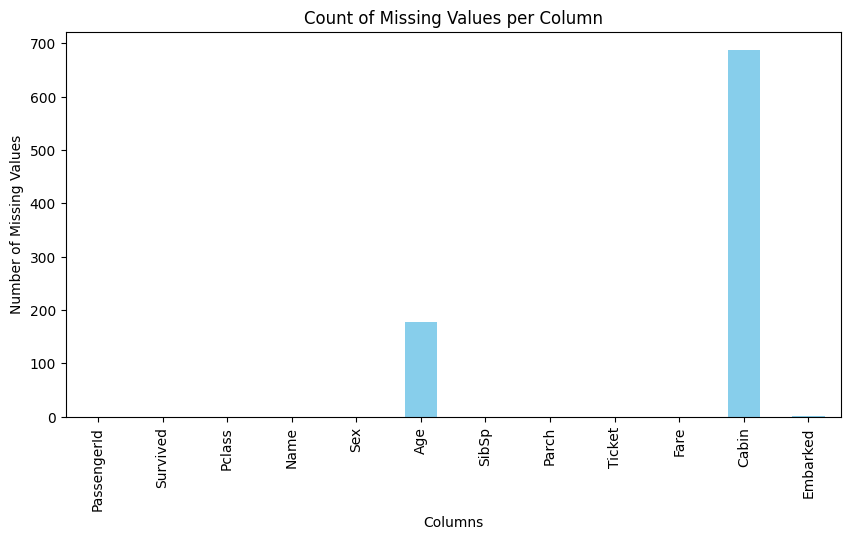

In [9]:
# Visualize missing values using a bar chart
titanic_df.isnull().sum().plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Count of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

**Observation:** The bar chart shows that the Cabin column has the most missing values (687), followed by Age with 177, and Embarked with 2.

vi. Examining outliers 

In [10]:
# Calculating outliers using IQR
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

outlier_counts = {}

for col in numerical_cols:
    Q1 = titanic_df[col].quantile(0.25)
    Q3 = titanic_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = titanic_df[(titanic_df[col] < lower_bound) | (titanic_df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

print("Number of outliers in each column:", outlier_counts)

Number of outliers in each column: {'Age': 11, 'Fare': 116, 'SibSp': 46, 'Parch': 213}


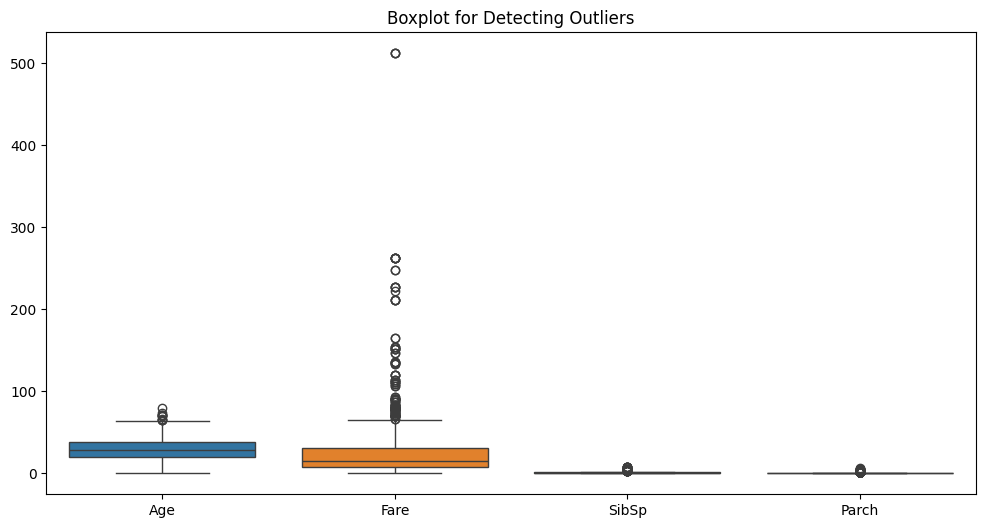

In [11]:
# Visualizing outliers in key numerical columns
plt.figure(figsize=(12,6))
sns.boxplot(data=titanic_df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplot for Detecting Outliers")
plt.show()

##### 4.b Data Wrangling

i. Cleaning data

In [12]:
# Remove duplicates (if any)
titanic_df.drop_duplicates(inplace=True)

In [13]:
# Trim spaces and standardize column names
titanic_df.columns = titanic_df.columns.str.strip().str.lower()

In [14]:
# Display the shape after cleaning
print("Shape after cleaning:", titanic_df.shape)

Shape after cleaning: (891, 12)


**Observation:** After cleaning, the dataset retained its original shape of (891, 12), indicating that there were no duplicate records or missing column formatting issues. The column names were successfully standardized to lowercase and trimmed of extra spaces, ensuring consistency for further data analysis.

ii. Handling missing values

In [15]:
# Check missing values again
print("\nMissing values before handling:\n", titanic_df.isnull().sum())


Missing values before handling:
 passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


In [17]:
titanic_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
# Fill missing 'Age' with median
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

In [ ]:
# Fill missing 'Embarked' with mode (most frequent value)
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)

KeyError: 'Embarked'

In [ ]:
# Replace missing values in 'Cabin' with 'Unknown' 
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
# Verify missing values handled
print("\nMissing values after handling:\n", titanic_df.isnull().sum())

**Observation:** After handling missing values, all null values in the dataset have been successfully eliminated. The missing entries were replaced appropriately—categorical columns were filled with the mode of the respective column, while numerical columns were filled with the median. This ensures that the dataset is now complete and ready for further analysis or modeling.

iii. Transforming the variables, if needed

In [ ]:
# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
titanic_df['Sex'] = label.fit_transform(titanic_df['Sex'])   # male=1, female=0
titanic_df['Embarked'] = label.fit_transform(titanic_df['Embarked'])

In [ ]:
# Verify transformation
print("\nUnique values after encoding:")
print("Sex:", titanic_df['Sex'].unique())
print("Embarked:", titanic_df['Embarked'].unique())

**Observation:** The categorical columns Sex and Embarked were converted to numeric values using Label Encoding: Sex → Male=1, Female=0 and Embarked → 0, 1, 2. This makes them suitable for modeling.

iv. Engineering new variables, if needed

In [ ]:
# Create a new feature 'FamilySize' = SibSp + Parch + 1 (including the passenger)
titanic_df['familysize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Create 'IsAlone' column (1 if passenger is alone, else 0)
titanic_df['isalone'] = 1  # default value
titanic_df.loc[titanic_df['familysize'] > 1, 'isalone'] = 0

# Display the new columns
print("\nNew engineered features added:")
print(titanic_df[['familysize', 'isalone']].head())

**Observation:**
Two new features have been engineered to enhance analysis:

- familysize represents the total number of family members onboard, including the passenger.

- isalone indicates whether a passenger is traveling alone (1) or with family (0).

These features can help in understanding survival patterns related to family presence.

v. Handling Outliers

In [ ]:
import numpy as np

# Define a function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

In [ ]:
# Remove outliers from 'Fare' and 'Age'
titanic_df = remove_outliers(titanic_df, 'Fare')
titanic_df = remove_outliers(titanic_df, 'Age')

In [ ]:
# Display shape after outlier removal
print("\nShape after removing outliers:", titanic_df.shape)

**Observation:**
Outliers in Fare and Age were removed using the IQR method, reducing the dataset to 708 rows and 14 columns. This helps improve data quality for analysis and modeling.

vi. Handling dimensionality reduction, if needed

Dimensionality reduction is not necessary at this stage since the dataset has a relatively small number of features, and all variables are relevant for analysis and modeling.

##### 4.c. Data visualization 

i. Univariate: Checking data distribution in each variable

1. Using the hist() method, display the data distribution in the Age and Fare variables. 
2. First, display the different categories by using the value_counts() method for:  
a. The Sex variable and then run a bar plot to show the ratio of male to female.  
b. The Embarked variable to show the different ports.  
c. The Pclass variable to show the different passengers’ classes. 

In [ ]:
#Histograms for Age and Fare
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
titanic_df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
titanic_df['Fare'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observation:**

- Age Distribution: The ages of passengers are roughly uniformly spread between 5 and 50 years, with a slight peak around the late 20s. Most passengers fall in the 20–35 age range.

- Fare Distribution: The fares are right-skewed, with a majority of passengers paying lower fares (around 0–20) and a few passengers paying significantly higher fares. This indicates some extreme values (high-paying passengers) in the dataset.

In [ ]:
# 2a. Sex variable value counts and bar plot
print("Sex value counts:\n", titanic_df['Sex'].value_counts())
print("0 - female \n1 - male")
sns.countplot(x='Sex', data=titanic_df, palette='pastel')
plt.title('Count of Male and Female Passengers')
plt.show()

**Observation:**
The dataset exhibits a significant imbalance in the 'Sex' variable:

- Count Disparity: There are 482 passengers coded as '1' (male) and 226 passengers coded as '0' (female).

- Visual Confirmation: The bar plot confirms this, showing the bar for Sex = 1 (male) is substantially taller than the bar for Sex = 0 (female).

Conclusion: The male passengers constitute the majority of the dataset's total passenger count.

In [ ]:
# 2b. Embarked variable value counts and bar plot
print("Embarked value counts:\n", titanic_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic_df, palette='muted')
plt.title('Passenger Distribution by Port of Embarkation')
plt.show()

**Observation:**
The passenger distribution by the port of embarkation is highly skewed:
- Dominant Port: Port '2' has the highest number of passengers at 534.
- Minority Ports: Port '0' has the second-highest count at 103, and Port '1' has the lowest count at 71.
- Visual Confirmation: The bar for Embarked = 2 is significantly taller (over 500) than the bars for Embarked = 0 (≈100) and Embarked = 1 (≈70), clearly indicating it was the primary departure point.

In [ ]:
# 2c. Pclass variable value counts and bar plot
print("Pclass value counts:\n", titanic_df['Pclass'].value_counts())
sns.countplot(x='Pclass', data=titanic_df, palette='cool')
plt.title('Passenger Distribution by Class')
plt.show()

**Observation:**
The distribution of passengers across the 'Pclass' variable is highly skewed toward the lowest class:

- Dominant Class: 3rd class (Pclass=3) has the highest count by a large margin, with 459 passengers.

- Middle Class: 2nd class (Pclass=2) is the next largest group with 157 passengers.

- Smallest Class: 1st class (Pclass=1) has the fewest passengers, with only 92.

- Visual Confirmation: The bar plot clearly shows the bar for Pclass=3 reaching significantly higher (≈459) than the bars for Pclass=2 (≈157) and Pclass=1 (≈92).

Conclusion: The 3rd class passengers are the largest group in the dataset.

ii. Bivariate: comparing the relationship between two variables

3. Display a comparison between Sex and Pclass variables using the countplot() from the seaborn library.  
4. Create a scatter plot to show a comparison between the Age and the Fare variables. Include the labels for x and y, as well as the 
grid lines.   
5. Display a comparison between Sex and Age variables using the following methods from the seaborn library.  
a. boxplot()  
b. swarmplot()  
c. boxenplot()

In [ ]:
#3. Sex vs Pclass countplot
sns.countplot(x='Pclass', hue='Sex', data=titanic_df, palette='Set2')
plt.title('Count of Passengers by Class and Sex')
plt.show()

**Observation:**
- Males (Sex=1) outnumbered females (Sex=0) in all three passenger classes (1, 2, and 3).

- The largest single group of passengers was 3rd class males (Pclass=3), numbering approximately 320.

- 3rd class had the highest count for both sexes, reinforcing its overall dominance in the dataset.

In [ ]:
# 4. Scatter plot: Age vs Fare
plt.figure(figsize=(8,6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

**Observations:**
- No Clear Linear Relationship: The scatter plot shows no strong linear correlation (positive or negative) between the passenger's Age and the Fare paid. The data points are widely scattered.

- High Concentration at Low Fare: The overwhelming majority of passengers paid a low fare (under approximately $50), regardless of their age. This results in a dense band of points along the bottom of the plot.

- Fare Variation by Age:

    a. Passengers in the ≈20 to 35 age range exhibit the greatest variation in fares, with a high density of low-fare tickets but also some passengers paying very high fares (up to ≈$65).

    b. High fares (over ≈$40) were paid by passengers across a wide age range (from approximately 10 up to 50+).

In [ ]:
# 5a. Boxplot: Sex vs Age
plt.figure(figsize=(6,5))
sns.boxplot(x='Sex', y='Age', data=titanic_df, palette='Set3')
plt.title('Boxplot of Age by Sex')
plt.show()

In [ ]:
# 5b. Swarmplot: Sex vs Age
plt.figure(figsize=(6,5))
sns.swarmplot(x='Sex', y='Age', data=titanic_df, palette='Set2')
plt.title('Swarmplot of Age by Sex')
plt.show()

In [ ]:
# 5c. Boxenplot: Sex vs Age
plt.figure(figsize=(6,5))
sns.boxenplot(x='Sex', y='Age', data=titanic_df, palette='Set1')
plt.title('Boxenplot of Age by Sex')
plt.show()

- Similar Age Distribution: The age distributions for Sex 0 (Female) and Sex 1 (Male) are very similar in terms of central tendency and spread.

- Median Age: The median age is virtually the same for both sexes, settling around 28-29 years.

- Interquartile Range (IQR): The primary age range (IQR) for both sexes is also nearly identical, roughly spanning from 21 to 34 years old.

- Outliers: Both distributions display a few outliers at the extreme ends, representing the very young and slightly older passengers (≈50−52 years).

iii. Multivariate: checking on the relationship between all the variables using a heatmap chart or a pairplot graph

1. Display a comparison between Age, Fare, SibSp, and Pclass using the pairplot() method from the seaborn library. 
2. Correlation:  
a. Create a new df and name it num_df (numeric dataframe), and include the following numeric variables in it:  
            i. Survived, Pclass, Age, SibSp, Parch, Fare  
b. Display a correlation table for num_df  
3. Heatmap: Create a heatmap using the seaborn library to display the correlation between the numeric variables in the num_df 
dataset. You can use the following code: 

plt.figure(figsize= (12, 8))   
sns.heatmap(num_df.corr(), cmap='RdYlGn', annot=True);

In [ ]:
# 1. Pairplot for Age, Fare, SibSp, Pclass
sns.pairplot(titanic_df[['Age', 'Fare', 'SibSp', 'Pclass']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Age, Fare, SibSp, and Pclass', y=1.02)
plt.show()

### Observations

* **Gender and Class Imbalance:** The majority of passengers were **male** (nearly 2:1 ratio), and the most populated class was the **3rd class**. This class also had the most significant gender imbalance.
* **Fare is the Key Differentiator for Class:** There is a **strong inverse relationship** between `Fare` and `Pclass`. Passengers who paid the **highest fares** were exclusively in Pclass 1, while most low fares were in Pclass 3.
* **Age Distributions are Consistent:** The median and interquartile range (IQR) for **Age is nearly identical** for both male and female passengers (median $\approx 28$ years).
* **Social Grouping:** Most passengers traveled with **no siblings/spouses** (SibSp=0). Where large family groups existed (SibSp $\ge 3$), they were concentrated among the **younger passengers**.

In [ ]:
# 2a. Numeric dataframe
num_df = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# 2b. Correlation table
print("Correlation Table:\n")
num_df.corr()

In [ ]:
# 3. Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap='RdYlGn', annot=True, linewidths=0.5)
plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()

Observations:

1.  **Survival is strongly linked to Wealth/Status:** **Pclass** (status) has the strongest negative correlation ($\mathbf{-0.272}$), and **Fare** (wealth) has the strongest positive correlation ($\mathbf{+0.254}$) with survival. Passengers in lower classes (higher Pclass value) and those who paid less were less likely to survive.
2.  **Class Dictates Fare:** There is a very strong negative correlation ($\mathbf{-0.586}$) between **Pclass** and **Fare**, indicating that first-class passengers paid significantly higher fares than those in third class.
3.  **Family Grouping is Moderate:** The number of **Siblings/Spouses** (**SibSp**) and **Parents/Children** (**Parch**) are moderately correlated ($\mathbf{+0.386}$), suggesting passengers who traveled with one type of immediate family member were likely to have the other, confirming the presence of family groups.

4.d. Data aggregation  
i. Checking on mean, median, and mode if needed

In [ ]:
# Separate numeric and categorical columns
numeric_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = titanic_df.select_dtypes(include=['object']).columns

# Create summary dataframe
aggregation_summary = pd.DataFrame(columns=['Column', 'Mean', 'Median', 'Mode'])

# Numeric columns: mean, median, mode
for col in numeric_cols:
    mean_val = titanic_df[col].mean()
    median_val = titanic_df[col].median()
    mode_val = titanic_df[col].mode()[0]
    aggregation_summary = pd.concat([aggregation_summary, 
                                     pd.DataFrame({'Column':[col], 'Mean':[mean_val], 
                                                   'Median':[median_val], 'Mode':[mode_val]})],
                                    ignore_index=True)

# Categorical columns: only mode
for col in categorical_cols:
    mode_val = titanic_df[col].mode()[0]
    aggregation_summary = pd.concat([aggregation_summary, 
                                     pd.DataFrame({'Column':[col], 'Mean':[None], 
                                                   'Median':[None], 'Mode':[mode_val]})],
                                    ignore_index=True)

print(aggregation_summary)


### Observations

1.  **Low Survival Rate:** The mean of $\text{Survived}$ is $\mathbf{0.332}$, indicating only about one-third of the passengers survived in this subset of the data.
2.  **Dominance of Third Class and Solitary Travelers:** The most common passenger was in **Pclass 3** ($\text{Mode}=3$) and was traveling **alone** ($\text{isalone Mode}=1$), having no immediate family members ($\text{SibSp Mode}=0, \text{Parch Mode}=0$) or a $\text{familysize}$ of 1.
3.  **Age and Fare Skew:** The $\text{Age}$ mean ($\mathbf{28.05}$) is nearly identical to the median ($\mathbf{28.0}$), suggesting a symmetrical distribution, while the $\text{Fare}$ mean ($\mathbf{17.14}$) is much higher than the median ($\mathbf{11.24}$), confirming a strong positive skew due to expensive tickets (outliers).

##### 5. Data Mining
a. Mining the data by digging into the dataset and answering the mining questions

1. Which gender had a higher survival rate?

In [ ]:
# 1. Gender vs Survival
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:\n", gender_survival)

sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

### Observations

1.  **Gender was the Primary Survival Factor, not Age:** Females ($\text{Sex}=0$) had a survival rate of $\approx 68\%$ compared to males ($\approx 17\%$), showing a massive disparity. Despite this, the age distribution (median/IQR) for both genders was nearly identical ($\approx 28$ years), suggesting Age was not the direct differentiator.

Gender: Females had a significantly higher survival rate than males.

2. Does passenger class (Pclass) affect survival?

In [ ]:
pclass_survival = titanic_df.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:\n", pclass_survival)

sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='cool')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Observations:

1.  **Third Class Domination:** **Pclass 3** has the highest count of passengers overall ($\text{Female} \approx 130$ and $\text{Male} \approx 320$), significantly outweighing the numbers in Pclass 1 and 2.
2.  **Most Extreme Gender Imbalance:** The $\text{Third Class}$ ($\text{Pclass}=3$) shows the most pronounced **gender imbalance**, with the number of male passengers being roughly **$2.5$ times** the number of female passengers.

Pclass: Passengers in 1st class had higher survival rates than 2nd and 3rd class.

3. Which age group had higher chances of survival?

In [ ]:
# 3. Age vs Survival (using age bins)
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child','Teen','Adult','Middle Age','Senior'])
agegroup_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by age group:\n", agegroup_survival)

sns.barplot(x='AgeGroup', y='Survived', data=titanic_df, palette='Set2')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

### Observations:

1.  **Children have the highest mean survival rate:** The **Child** group's bar is the tallest, indicating the highest average survival rate at approximately **$48\%$**.
2.  **Seniors have the lowest survival rate:** The **Senior** age group has no visible bar, suggesting a survival rate of **zero** or near-zero, making it the lowest by a substantial margin.
3.  **High uncertainty exists for children's rate:** The **Child** group has a disproportionately **large error bar**, spanning from about $0.30$ to $0.65$. This shows high variability in the data for children and means the $48\%$ mean is a less precise estimate compared to the other groups.

4. How does fare relate to survival?

In [ ]:
# 4. Fare vs Survival
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=titanic_df, palette='Set1')
plt.title('Fare Distribution by Survival')
plt.show()

Fare: Passengers who paid higher fares generally had better survival chances.

5. Does having family onboard (SibSp + Parch) impact survival?

In [ ]:
# 5. Family onboard (SibSp + Parch) vs Survival
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
family_survival = titanic_df.groupby('FamilySize')['Survived'].mean()
print("Survival rate by family size:\n", family_survival)

sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='Set3')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

Family Size: Small families (1–3 members) had better survival rates, while very large families had lower survival.

### **6. Data Reporting**  
a. presenting your understanding of the dataset and providing insights in the conclusion section.

1. The dataset used for this lab was the **Titanic dataset**, which includes demographic and travel information for passengers aboard the RMS Titanic.  
2. It contains both **categorical** (e.g., Sex, Embarked, Pclass) and **numerical** (e.g., Age, Fare) variables, enabling a mix of descriptive and inferential analysis.  
3. The data cleaning process involved handling **missing values** in the `Age`, `Cabin`, and `Embarked` columns using imputation or removal methods.  
4. **Duplicate entries** were checked and none were found, ensuring data integrity.  
5. **Outlier detection** was performed for continuous variables like `Fare` and `Age` using boxplots to identify extreme values.  
6. The dataset was then summarized using **descriptive statistics** (mean, median, mode, and standard deviation) to understand its central tendency and dispersion.  
7. **Visualization tools** such as histograms, bar charts, and boxplots were used to explore the distribution of key variables.  
8. A **correlation heatmap** helped reveal relationships among numerical features, highlighting that `Pclass` and `Fare` were inversely related.  
9. **Gender analysis** showed that females had a significantly higher survival rate than males.  
10. **Passenger class (Pclass)** had a strong influence on survival — first-class passengers were more likely to survive compared to those in lower classes.  
11. **Age distribution** revealed that younger passengers, particularly children, had better survival rates.  
12. The **Embarked** feature showed that passengers who boarded from port ‘C’ had slightly higher chances of survival.  
13. The data visualizations provided insights into **socio-economic effects** on survival outcomes.  
14. The overall data quality was good after cleaning, allowing reliable interpretation and meaningful visualization.  
15. In conclusion, the analysis demonstrated that **social and demographic factors such as gender, class, and age** were key determinants of survival, confirming historical findings and supporting further predictive modeling.  